In [1]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np
import scipy.stats as stats
plt.rcParams['axes.grid'] = True

In [2]:
def dice():
    plt.stem(range(1,7), [1/6]*6, use_line_collection=True)
    plt.xlabel("Wynik")
    plt.ylabel("Prawdopodobieństwo")
    
def dice_dist():    
    y = [1/6*i for i in range(7)]
    plt.hlines(y, range(0, 7), range(1, 8), color='#1f77b4')
    plt.plot(range(1, 7), y[1:], 'o')
    plt.plot(range(1, 7), y[:-1], 'o', fillstyle='none', color='#1f77b4')
    plt.xlabel("Wynik")
    plt.ylabel("Dystrybuanta")
    plt.xlim(0,7)

def normal(density=True):
    x = np.linspace(-3, 3, 100)
    fun = stats.norm.pdf if density else stats.norm.cdf
    plt.plot(x, fun(x, 0, 1))
    plt.xlabel("x")
    ylab = "f(x)" if density else "F(x)"
    plt.ylabel(ylab)
    
def binary(p=0.5):
    plt.stem([0,1], [1-p, p], use_line_collection=True)
    plt.xlabel("x")
    plt.ylabel("P(X=x)")
    
def binom(n=10, p=0.5):
    plt.stem(range(n+1), stats.binom.pmf(range(n+1), n, p), use_line_collection=True)
    plt.xlabel("x")
    plt.ylabel("P(X=x)")

def uniform(a=0, b=1):
    x_lim = 4
    p = 1/(b-a)
    y = [0, p, 0]
    plt.hlines(y, [-x_lim, a, b], [a, b, x_lim], color='#1f77b4')
    plt.plot([a, b], [p, p], 'o')
    plt.plot([a, b], [0, 0], 'o', fillstyle='none', color='#1f77b4')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(-x_lim, x_lim)
    
def normal_param(mu=0, sigma=1):
    x_min = -10
    x_max = 10
    x = np.linspace(x_min, x_max, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(x_min,x_max)
    plt.ylim(0,0.45)
    
def normal_s(mu=0, sigma=1, a=0, b=1):
    x_min = -10
    x_max = 10
    x_s = np.linspace(-3, 3, 100)
    x = np.linspace(x_min, x_max, 100)
    plt.plot(x_s, stats.norm.pdf(x_s, 0, 1))
    plt.plot(x, stats.norm.pdf(x, mu+a, sigma/b))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(x_min,x_max)
    plt.ylim(0,0.45)

def fill(lower, upper, mu, sigma):    
    x = np.linspace(lower, upper, 100)
    y = stats.norm.pdf(x,mu,sigma)
    plt.fill_between(x, y, color='#0b559f', alpha=0.5)
    
def normal_shade(lower=0, upper=0):
    mu = 0
    sigma = 1
    x = np.linspace(-3.5*sigma, 3.5*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    fill(lower, upper, mu, sigma)
    plt.xlim(-3.25,3.25)

def monte_carlo(k=1):
    n = 10**k
    circle = plt.Circle((0, 0), 1, alpha=0.5)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.add_artist(circle)
    points = np.random.uniform(size=(2,n))
    plt.scatter(*points, s=5, c='r')
    pi = np.mean(np.linalg.norm(points, axis=0)<1)*4
    plt.title(r"$n=$"+str(n)+r"  $\pi=$"+str(pi))
    plt.xlim(0,1)
    plt.ylim(0,1)


# Rozkłady prawdopodobieństwa

## Pojęcia

- Doświadczenie losowe
- Zbiór zdarzeń elementarnych $\Omega$
- Zdarzenie elementarne
- Zdarzenie
- Zmienna losowa $X: \Omega \rightarrow R$

## Zmienna losowa dyskretna

### Funkcja prawdopodobieństwa

$\displaystyle p_i = P (X = x_i)$

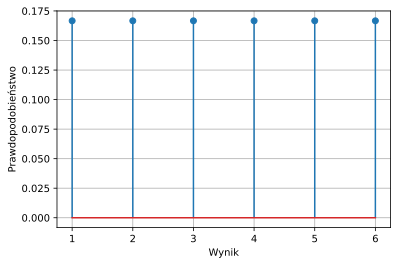

In [3]:
dice()

### Dystrybuanta

$\displaystyle F(x_0) = \sum_{x_i \leq x_0} P(X=x_i)$

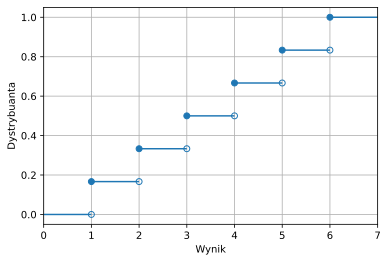

In [4]:
dice_dist()

## Zmienna losowa ciągła

### Funkcja gęstości

$f(x)$

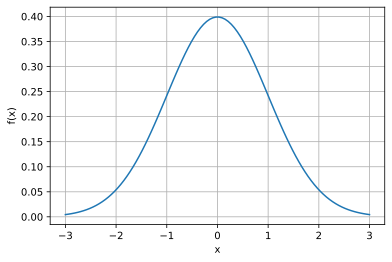

In [5]:
normal()

### Dystrybuanta

$F(x_0) = \int\limits_{-\infty}^{x_0}f(x)dx$

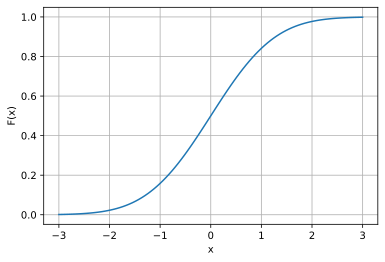

In [6]:
normal(density=False)

## Wskaźniki położenia i rozproszenia

### Wartość oczekiwana

$$E[X] = \sum x \cdot P(X = x)$$

### Wariancja

$$D^2[X] = \sum (x - E[X])^2 \cdot P (X = x) $$

### Odchylenie standardowe

$$D[X] = \sqrt{D^2[X]}$$

## Własności wartości oczekiwanej i wariancji

$$E[X+Y]=E[X]+E[Y]$$

$$E[k*X] = k*E[X]$$

$$D^2[X+Y] = D^2[X]+D^2[Y]\textrm{, jeśli } X \textrm{ i } Y \textrm{ niezależne}$$

$$D^2[k*X] = k^2*D^2[X]$$

## Rozkład dwupunktowy (zero-jedynkowy)

In [7]:
interact(binary, p=(0,1,0.1))

interactive(children=(FloatSlider(value=0.5, description='p', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.binary(p=0.5)>

- $X \sim B_1(p)$
- $X \in \{0,1\}$
- $P (X = 1) = p$
- $P (X = 0) = 1 - p$
- $E[X] =$
- $D^2[X]=$

## Rozkład dwumianowy

In [8]:
interact(binom, n=(5,10,1), p=(0,1,0.1))

interactive(children=(IntSlider(value=10, description='n', max=10, min=5), FloatSlider(value=0.5, description=…

<function __main__.binom(n=10, p=0.5)>

- $X \sim B_n(p)$
- $n \in N$
- $P (X = k) = {{n}\choose{k}} p^k(1-p)^{n-k}, k = 0, .., n$
- $E[X] =$
- $D^2[X] =$

## Rozkład jednostajny ciągły

In [9]:
interact(uniform, a=(-3,3,1), b=(-3,3,1))

interactive(children=(IntSlider(value=0, description='a', max=3, min=-3), IntSlider(value=1, description='b', …

<function __main__.uniform(a=0, b=1)>

- $X \sim U(a,b)$
- $a,b \in \mathbf{R}$
- $f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {dla} \ a\leq x\leq b,\\[8pt]0&\mathrm {dla} \ x<a\ \mathrm {lub} \ x>b\end{cases}}$
- $E[X] = \frac{a+b}{2}$
- $D^2[X] = \frac{(b-a)^2}{12}$

## Rozkład normalny

In [10]:
interact(normal_param, mu=(-10,10,1), sigma=(1,5,1))

interactive(children=(IntSlider(value=0, description='mu', max=10, min=-10), IntSlider(value=1, description='s…

<function __main__.normal_param(mu=0, sigma=1)>

- $X \sim N(\mu,\sigma)$
- $\mu \in \mathbf{R}, \sigma \in \mathbf{R}_+$
- $f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$, $x \in \mathbf{R}$ 
- $E[X] = \mu$
- $D^2[X] = \sigma^2$

## Reguła 3 sigm

![3 sigm](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/1024px-Standard_deviation_diagram_%28decimal_comma%29.svg.png)

[Źródło](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/1024px-Standard_deviation_diagram_%28decimal_comma%29.svg.png)

## Standaryzacja

In [11]:
mu = np.random.randint(-5, 5)
sigma = np.random.randint(1,5)
print("m =", mu, "sd =", sigma)
interact(normal_s, mu=fixed(mu), sigma=fixed(sigma), a = (-5,5,1), b=(1,5,1))

m = -5 sd = 1


interactive(children=(IntSlider(value=0, description='a', max=5, min=-5), IntSlider(value=1, description='b', …

<function __main__.normal_s(mu=0, sigma=1, a=0, b=1)>

$$Z = \frac{X - E[X]}{D[X]}$$

- $E[Z] = 0$
- $D^2[Z] = 1$ 

## Przykłady

In [12]:
interact(normal_shade, lower=(-3.5,3.5,0.1), upper=(-3.5,3.5,0.1))

interactive(children=(FloatSlider(value=0.0, description='lower', max=3.5, min=-3.5), FloatSlider(value=0.0, d…

<function __main__.normal_shade(lower=0, upper=0)>

$X \sim N(0, 1)$

- $P(X < 1.5) =$ 
- $P(X > 1.5) =$ 
- $P(-1.5 \leq X \leq 2) =$
- $P(X < x) = 0.6591$

$X \sim N(10, 5)$

- $P(8 \leq X \leq 12) =$
- $Y=\sum_{i=1}^4X_i$
- $P(Y < 50) = $

$IQ \sim N(100, 15)$
- top 10%?

## Centralne twierdzenie graniczne

Niech $X_1, X_2, ..., X_n$ będzie ciągiem zmiennych losowych:
- niezależnych
- o takim samym rozkładzie
- takich że $E[X_i] = \mu < \infty$
- takich że $0 < D^2[X_i] = \sigma^2 < \infty$
Niech:
$$\bar{X_n} = \frac{1}{n} \sum\limits_{i=1}^{n} X_i$$

$$U_n = \frac{\bar{X_i}-\mu}{\sigma} \cdot \sqrt{n}$$

Wtedy:
$$\forall u \in \mathbf{R} \lim\limits_{n\rightarrow\infty} P(U_n < u) = \Phi(u)$$

Dla sum:
$$S_n = \sum\limits_{i=1}^{n}X_i$$

$$Z_n = \frac{S_n - n\cdot\mu}{\sigma\cdot\sqrt{n}}$$

## Metoda Monte Carlo

In [13]:
interact(monte_carlo, k=(1,4,1))

interactive(children=(IntSlider(value=1, description='k', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.monte_carlo(k=1)>